In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


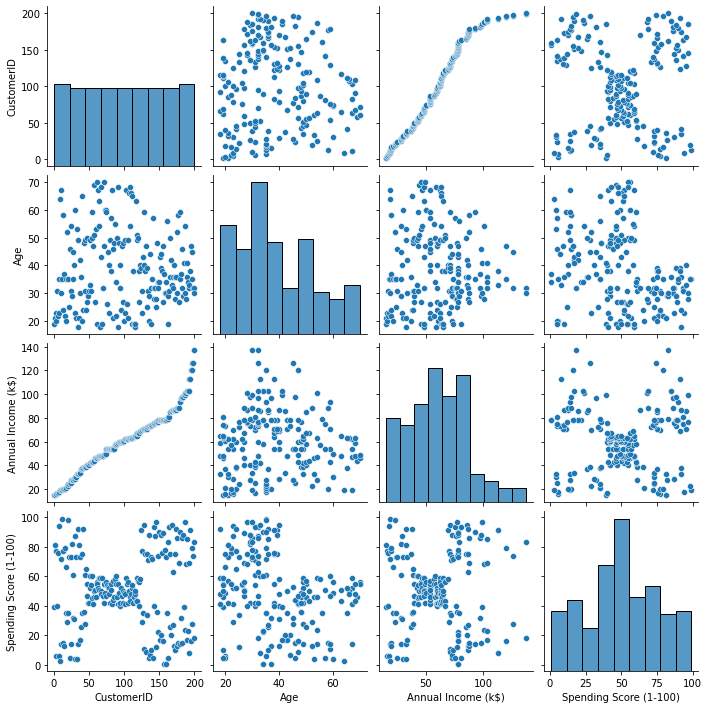

In [3]:
sns.pairplot(df)#2d

In [4]:
x=df.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import KMeans

In [6]:
#whithi the sum cluster
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i , random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


In [7]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30566.45113025185,
 25005.550372432845,
 21996.523372372296,
 19746.91195766089]

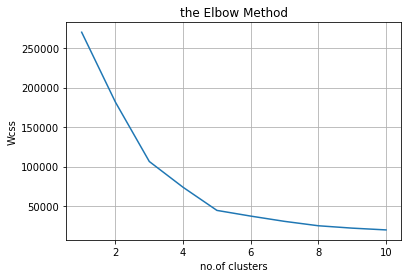

In [8]:
plt.plot(range(1,11),wcss)
plt.title("the Elbow Method")
plt.xlabel("no.of clusters")
plt.ylabel("Wcss")
plt.grid(True)
plt.show()

In [9]:
kmeans=KMeans(n_clusters=5, random_state=1)
ykmeans=kmeans.fit_predict(x)

In [10]:
ykmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [11]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df["Target"]=ykmeans

In [13]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [14]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

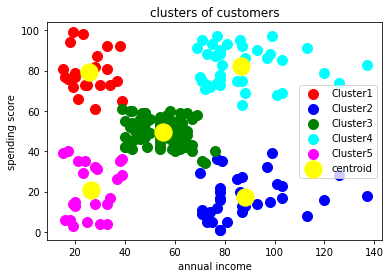

In [15]:
plt.scatter(x[ykmeans==0,0],x[ykmeans==0,1], s=100,c="red",label="Cluster1")
plt.scatter(x[ykmeans==1,0],x[ykmeans==1,1], s=100,c="blue",label="Cluster2")
plt.scatter(x[ykmeans==2,0],x[ykmeans==2,1], s=100,c="green",label="Cluster3")
plt.scatter(x[ykmeans==3,0],x[ykmeans==3,1], s=100,c="cyan",label="Cluster4")
plt.scatter(x[ykmeans==4,0],x[ykmeans==4,1], s=100,c="magenta",label="Cluster5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="centroid")
plt.title("clusters of customers")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()

In [16]:
x=df.iloc[:,[3,4]].values
y=df["Target"].values

In [17]:
y

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [18]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size=0.25,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report


In [19]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = logreg.predict(xtest)
    print(classification_report(ytest,ypred))
    

In [20]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
svm=SVC()

In [21]:
mymodel(logreg)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [22]:
mymodel(knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [23]:
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

